# 1_Введение

✍В этом модуле мы начинаем знакомство с моделями машинного обучения. Как вы уже знаете, существует множество алгоритмов, позволяющих решать различные прикладные задачи.

В первую очередь класс модели определяется категорией обучения. В этом модуле мы поговорим о тех алгоритмах, которые относятся к категории обучения с учителем, а именно — к задаче регрессии.



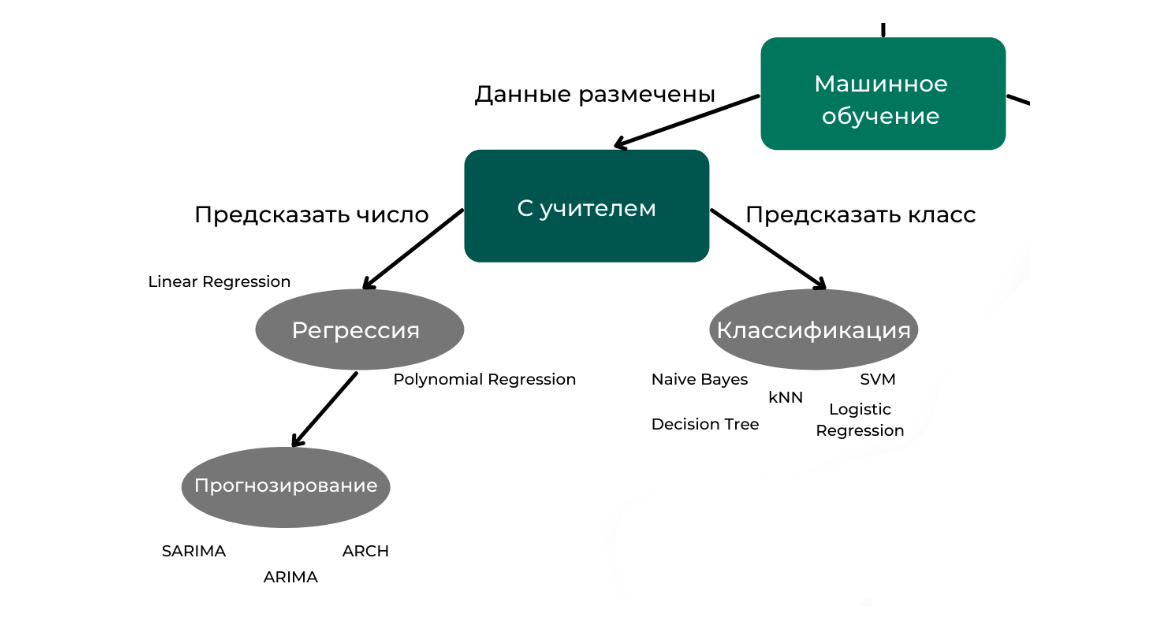

В категории обучения с учителем модели можно условно разделить на следующие основные типы:

* **Линейные модели**: линейная регрессия (для задачи регрессии) и логистическая регрессия (для задачи классификации) и производные от них.
* **«Древесные» модели**: дерево решений и производные от него. 
* **Метрические алгоритмы**: метод ближайших соседей и производные от него.
* **Байесовские методы**: метод наивного Байеса и производные от него.
* **Ансамблевые методы**: композиции из методов (бэггинг, стекинг, бустинг).

В этом модуле мы поговорим о линейных моделях (но на самом деле ими не ограничимся), которые позволяют решать задачу регрессии.

    Линейные модели — это модели, отображающие зависимость целевого признака от факторов в виде линейной взаимосвязи.

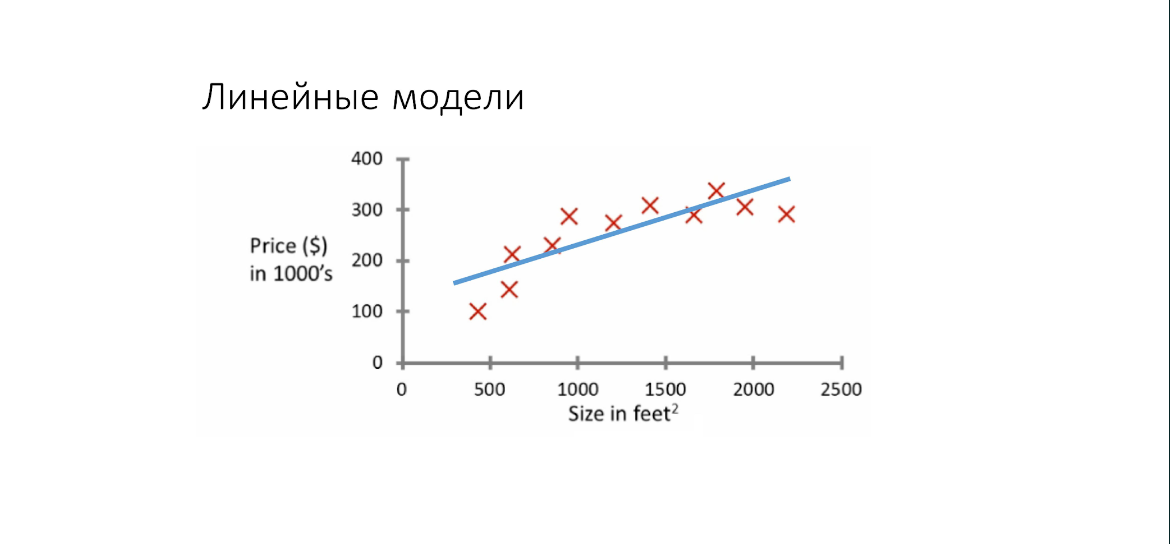

На данном графике мы видим зависимость цены товара от его размера. Из диаграммы рассеяния видно, что в среднем точки расположены на одной прямой линии. То есть зависимость линейная.

Подкласс линейных моделей в свою очередь содержит множество конкретных моделей. В библиотеке sklearn, которую мы будем использовать, все линейные алгоритмы содержатся в модуле linear_model. 

ЦЕЛИ ДАННОГО МОДУЛЯ:

1.Познакомиться с принципами работы модели линейной регрессии для решения задачи регрессии.

2.Рассмотреть аналитическое (метод наименьших квадратов) и численное (градиентный спуск) решение задачи поиска параметров модели.

3.Познакомиться с метриками регрессии.

4.Изучить понятия bias и variance и понять причины недообучения и переобучения линейной регрессии.

5.Рассмотреть полиномиальную регрессию как метод усложнения модели.

6.Познакомиться с регуляризацией и рассмотреть её основные методы.

7.Научиться решать задачи регрессии.

# 2_Линейная регрессия: аналитическое решение

✍ Для начала давайте вспомним, что такое задача регрессии в машинном обучении.

    Регрессия — это класс задач обучения с учителем, когда по определённому набору признаков объекта необходимо предсказать числовую целевую переменную.

**Цель обучения** — построить модель, которая бы отражала зависимость между признаками и целевой числовой переменной.

Когда зависимость принимается линейной, такая модель называется **линейной регрессией.**

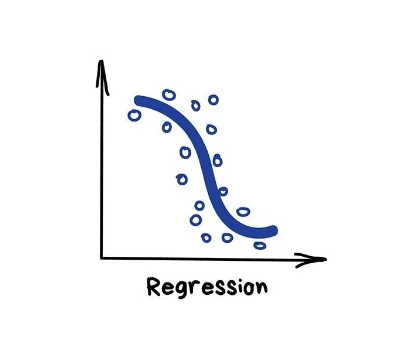

## ОБЩЕЕ ПРЕДСТАВЛЕНИЕ О ЛИНЕЙНОЙ РЕГРЕССИИ

    Линейная регрессия (Linear Regression) — одна из простейших моделей для решения задачи регрессии. Главная гипотеза состоит в том, что рассматриваемая зависимость является линейной.

Общий вид модели в случае, когда целевая переменная зависит от $m$ факторов, будет иметь следующий вид:

Давайте разбираться, что в этом выражении значит каждая из переменных. Начнём с простого — с двумерного случая.

### 2D-СЛУЧАЙ

Для начала поговорим о самом простом случае, когда у нас есть один фактор и зависящий от него целевой признак. Геометрически такая зависимость представляет собой координатную плоскость, где мы отмечаем точки по оси x и соответствующие им точки на оси y.

Рассмотрим задачу из нефтяной отрасли. Есть набор данных, где представлены данные о средней пористости скважин (в процентах) и добыче газа на этих скважинах в сутки (в миллионах кубических футов). 

Нам бы хотелось построить модель, которая опишет зависимость и позволит по известной пористости скважин предсказывать неизвестную выработку газа.

Зависимость целевого признака от фактора представлена на диаграмме рассеяния (см. ниже). Пористость скважины отложена по оси абсцисс — Porosity (%), а добыча газа — по оси ординат, Gas production (Mcf/day).

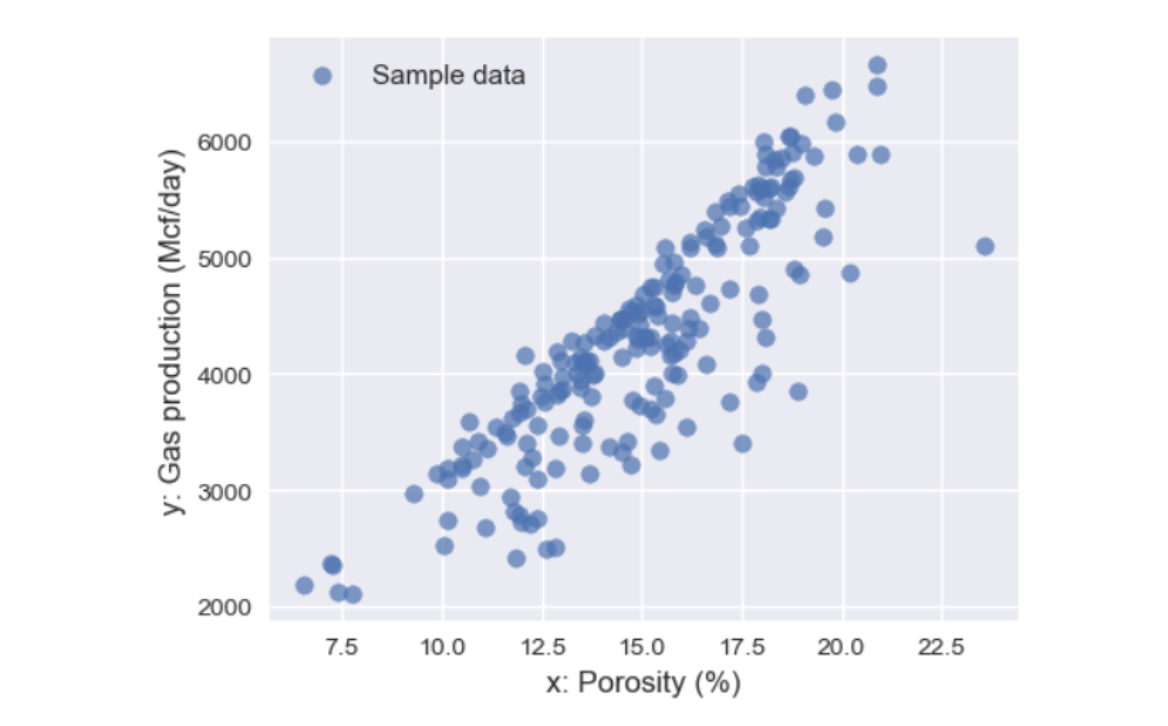

Из диаграммы отчётливо видно, что с ростом пористости скважины растёт добыча газа. Причём растёт она преимущественно линейно: основная масса точек находится на одной прямой.

Идея! Давайте проведём через точки прямую линию так, чтобы она максимально хорошо описывала зависимость.

Для этого сначала вспомним уравнение прямой из школьного курса математики:



где:

* $x$ — это некоторый фактор, от которого зависит целевая переменная $y$. В нашем случае, $x$ — это пористость скважины, а $y$ — добыча газа.
* $k$ — коэффициент наклона прямой (тангенс угла наклона). Если $k>0$, это означает, что угол наклона прямой острый и прямая возрастает. Если $k<0$, угол наклона тупой и прямая убывает.
* $b$ — коэффициент смещения прямой по оси $y$. Он будет соответствовать значению $y$ при $x=0$. То есть это точка пересечения прямой и оси Y.

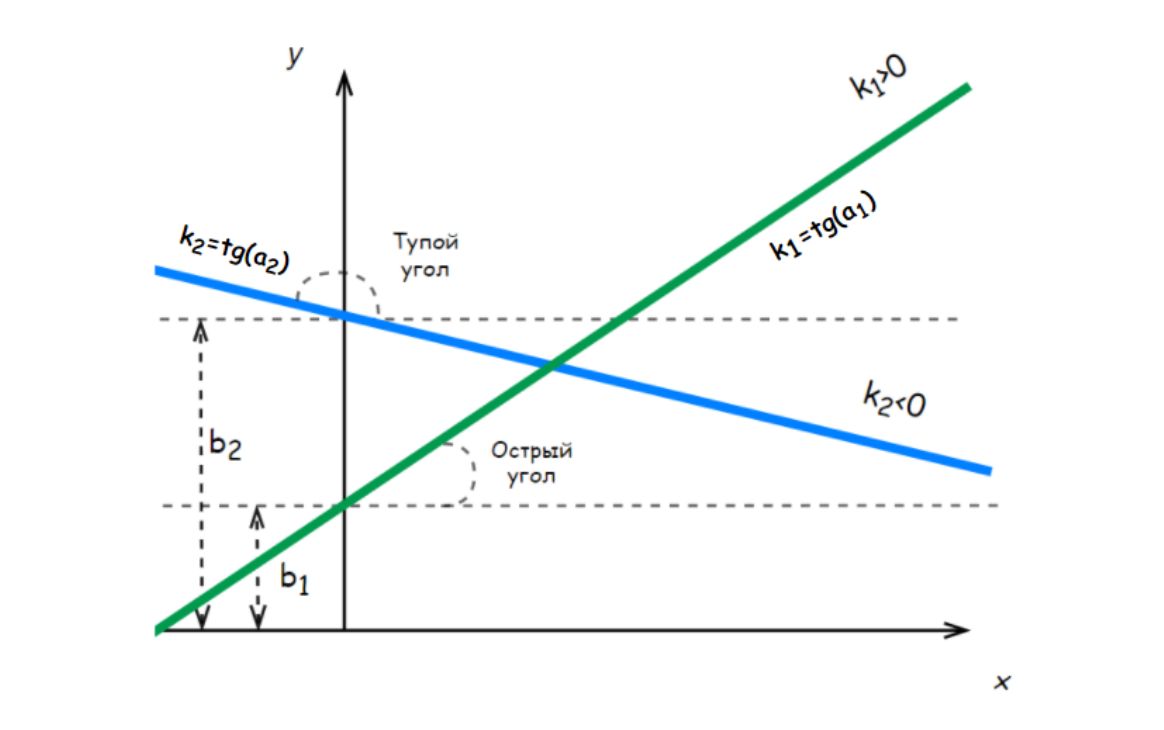

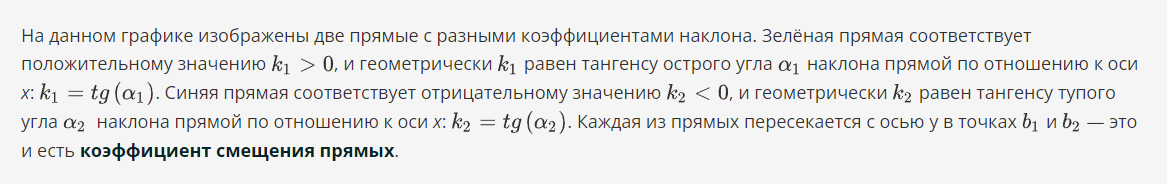

Это уравнение и есть двумерная модель линейной регрессии. Зная коэффициенты $k$ и $b$, мы можем подставить в него любую пористость скважины x и получить предсказание добычи газа y.

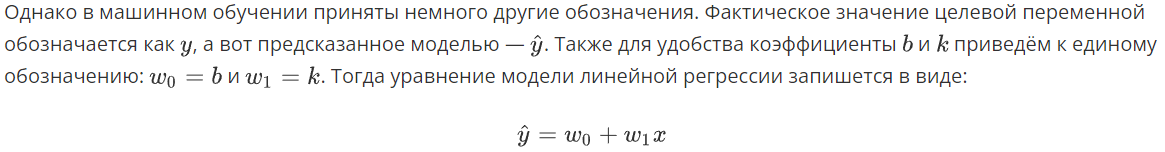

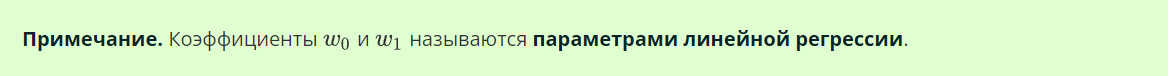

Остаётся только один вопрос: откуда, собственно, взять параметры? Обсудим этот вопрос чуть позже.

А пока представим, что параметры мы нашли. В таком случае можно построить прямую, которая опишет нашу зависимость. Пусть коэффициенты составляют (мы их нашли сами по методу наименьших квадратов, о котором поговорим ниже):

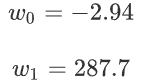

Тогда модель будет иметь следующий вид:

Если подставлять значения конкретные значения пористости $x$ в модель, можно построить прямую, которая описывает исходную зависимость. Это и будет графическая интерпретация нашей модели:



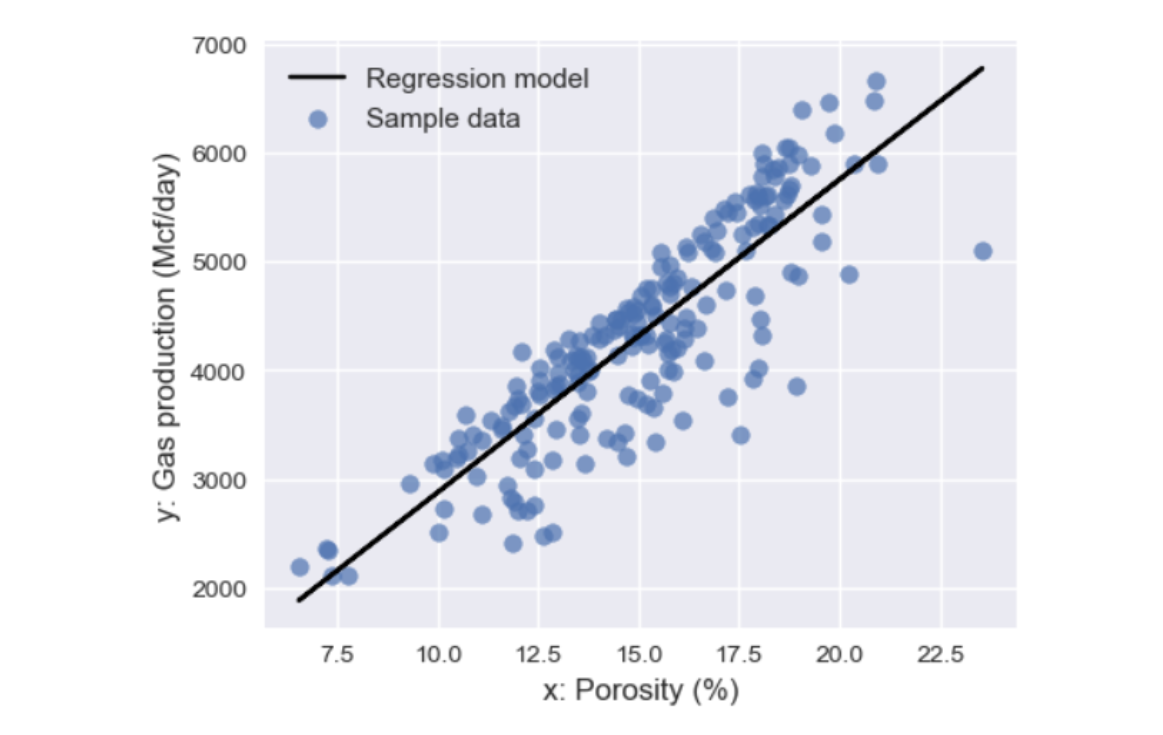

### 3D-СЛУЧАЙ

Теперь представим, что у нас не один фактор, а два. Например, помимо пористости скважины, мы дополнительно знаем ещё и о её хрупкости в процентах. То есть у нас теперь есть два фактора: $x1$ — пористость и $x2$ — хрупкость.

Можно отобразить такую зависимость добычи газа от этих факторов в трёхмерном пространстве в виде диаграммы рассеяния:

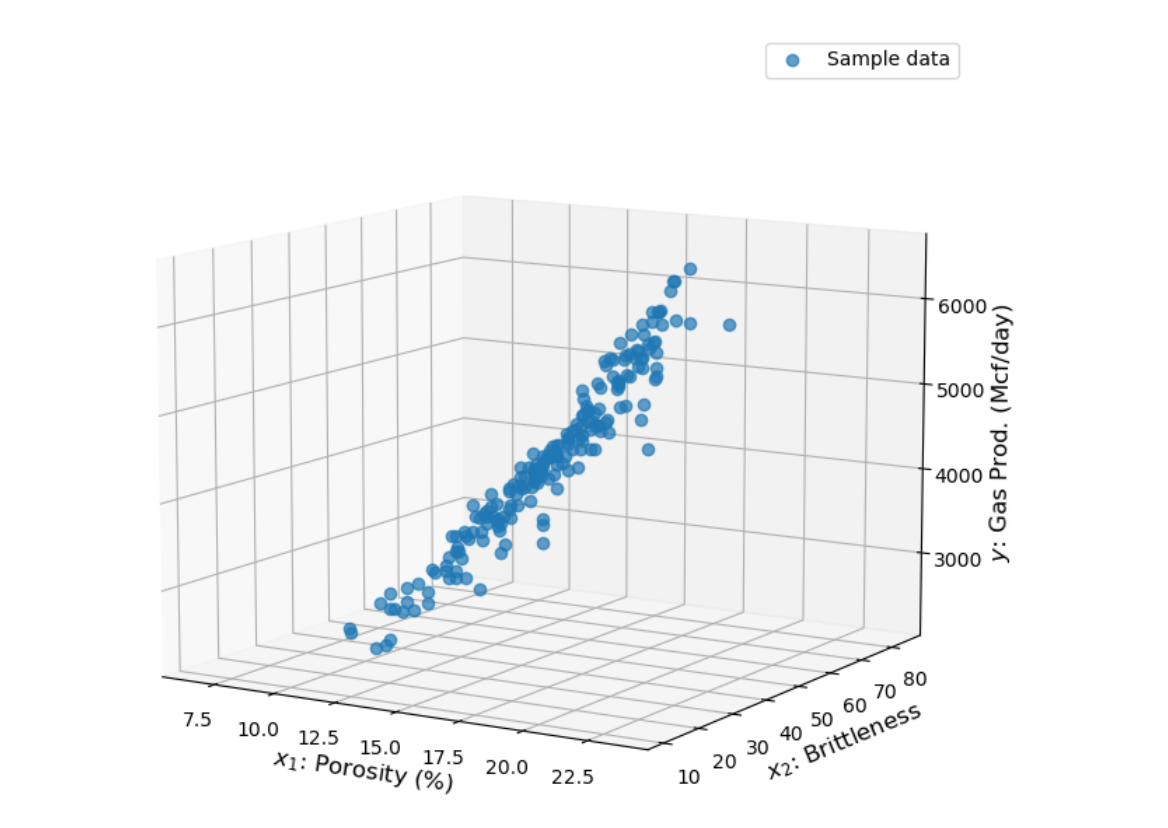

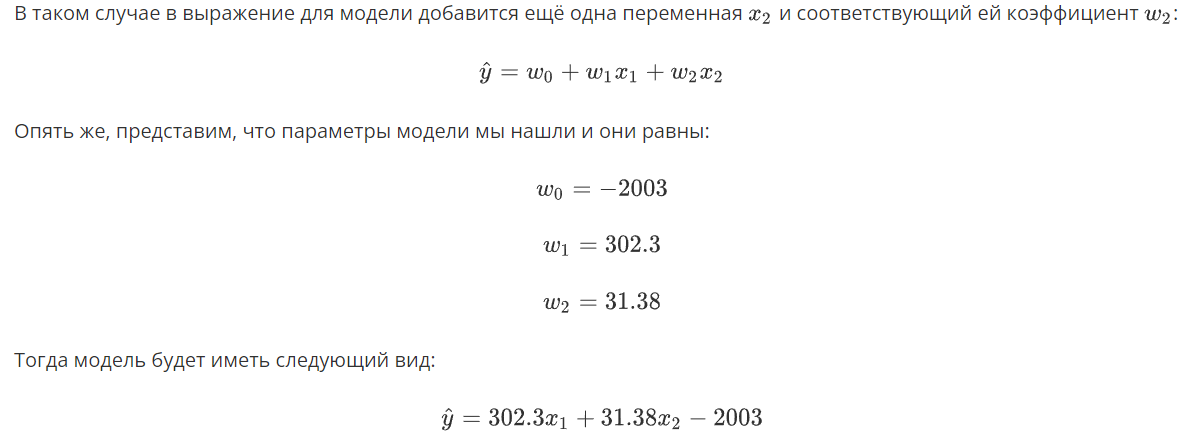

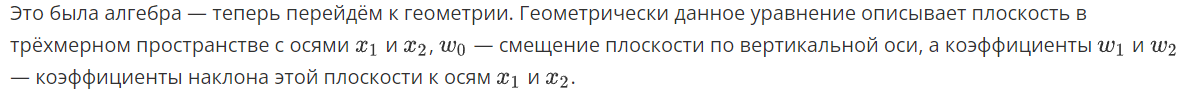

То есть это будет плоскость, которая подстроена под точки в трёхмерном пространстве:



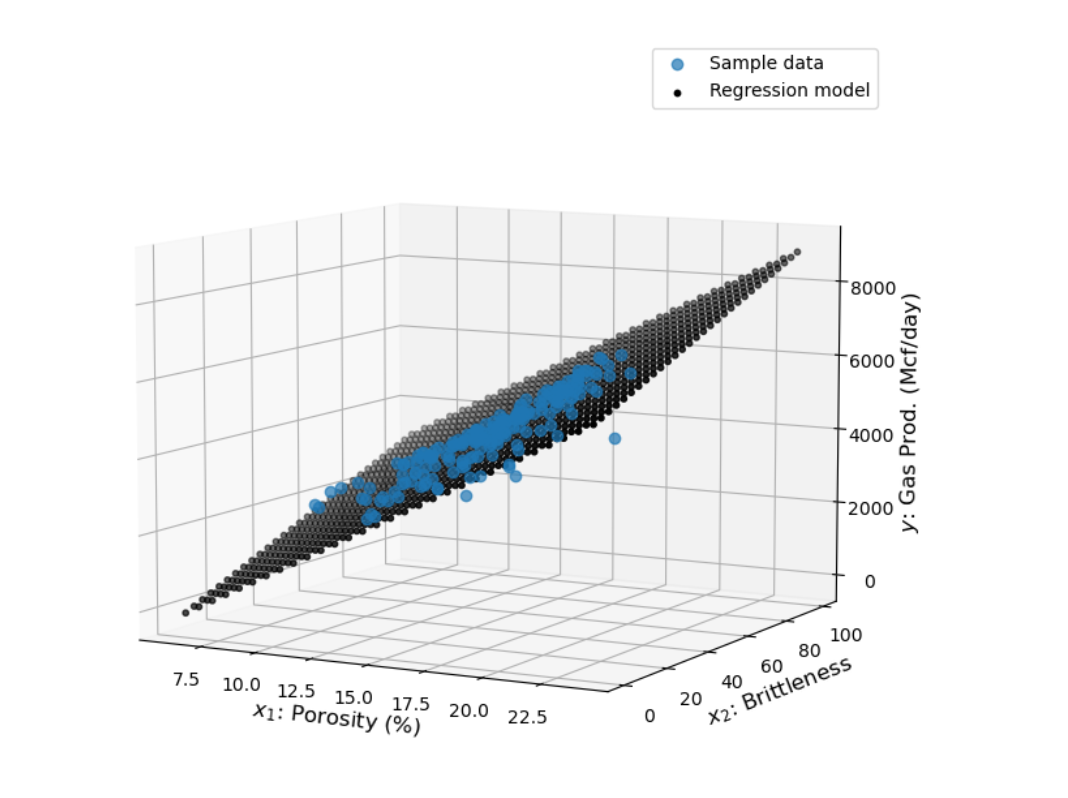

### ОБЩИЙ СЛУЧАЙ

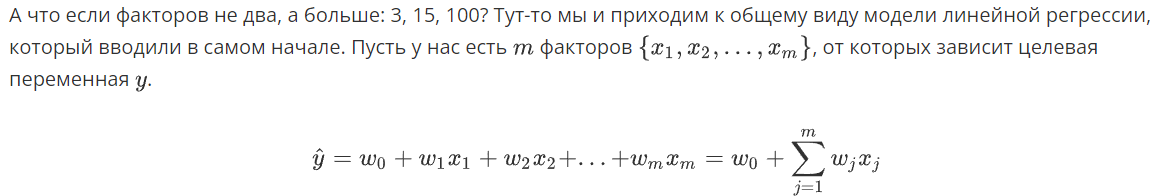

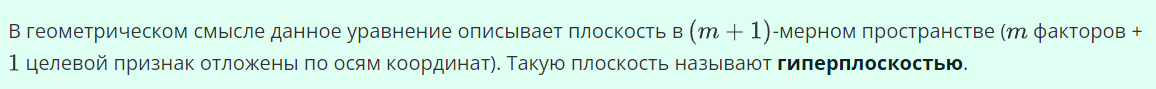

Абстрактное $(m+1)$-мерное пространство, конечно же, невозможно отобразить графически и сложно даже представить, как оно выглядит. Но нам это и не нужно. Все операции в таком пространстве аналогичны операциям в двумерном или трёхмерном пространстве.

→ Для понимания принципа работы мы будем рассматривать только прямую в двумерном пространстве, а результат уже обобщать на случай с большей размерностью.

Стоит отметить, что в DS мы, как правило, работаем с большим количеством факторов (больше двух), которые описывают данные, поэтому отобразить модель в геометрическом пространстве не получится, но важно понимать, что представляет собой сама модель.

## ПОИСК ПАРАМЕТРОВ ЛИНЕЙНОЙ РЕГРЕССИИ: МЕТОД НАИМЕНЬШИХ КВАДРАТОВ

Теперь мы знаем, как выглядит модель линейной регрессии в общем случае: это простое линейное выражение, подставляя в которое значения факторов, можно найти целевую переменную. Это линейное выражение соответствует прямой, плоскости или гиперплоскости в зависимости от количества признаков.

Остаётся вопрос: **откуда взять коэффициенты, которые стоят при $x$?**

Прямую же можно провести как угодно. Вот например несколько прямых, построенных с различными случайными коэффициентами:

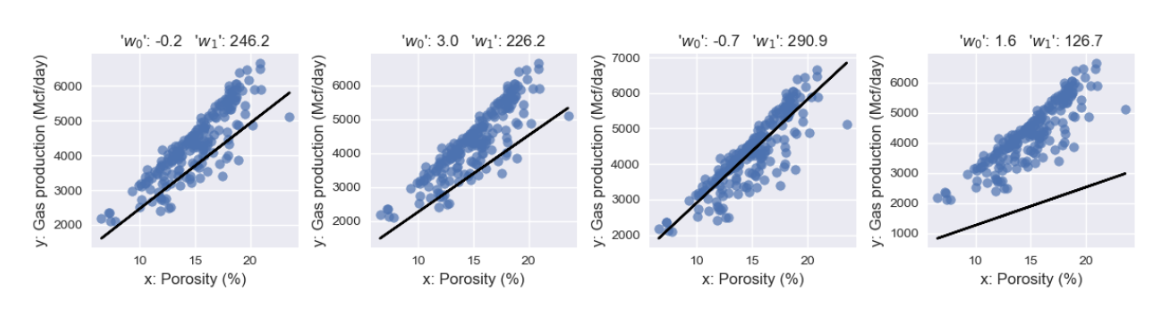

Какие параметры будут наилучшими?

Для ответа на этот вопрос давайте вспомним схему обучения моделей машинного обучения по принципу минимизации эмпирического риска, которую мы рассматривали в предыдущем модуле:

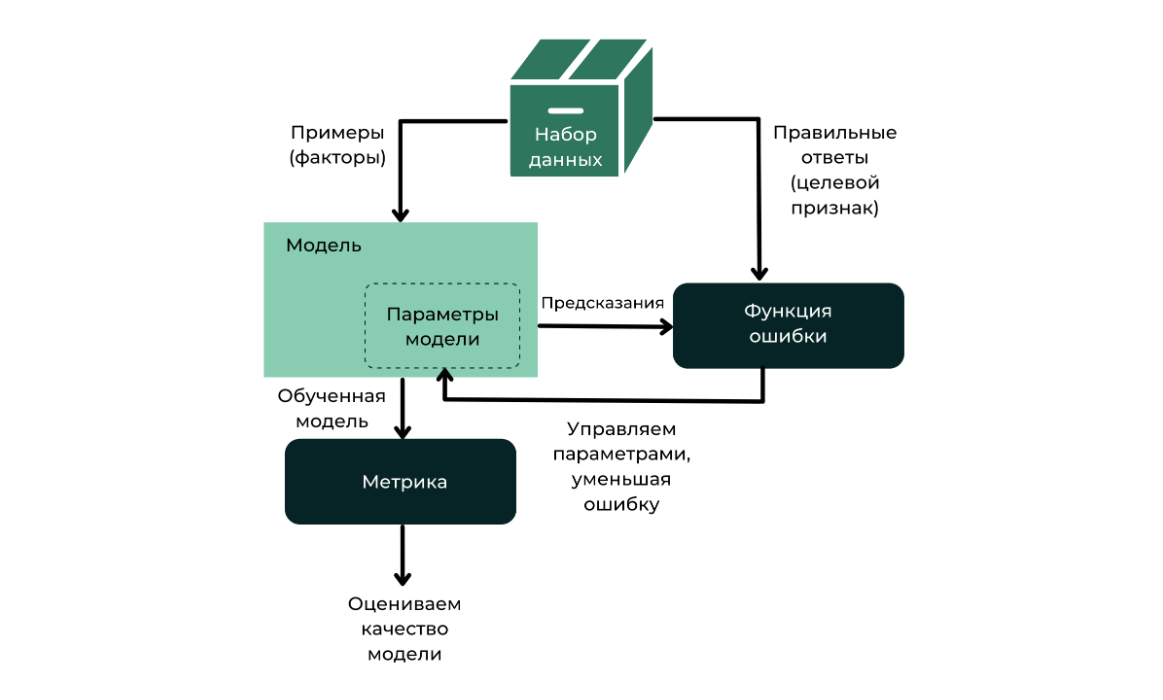

Согласно данной схеме обучения, поиск параметров производится путём минимизации некоторой функции ошибки. Математически мы пытаемся с помощью методов оптимизации найти такие параметры, чтобы ошибка была наименьшей из возможных.

Осталось только понять: где взять эту функцию ошибки? Ответ кроется в картинке ниже. Давайте представим, как могла бы выглядеть прямая в двумерном пространстве, проведённая, например, через пять точек:



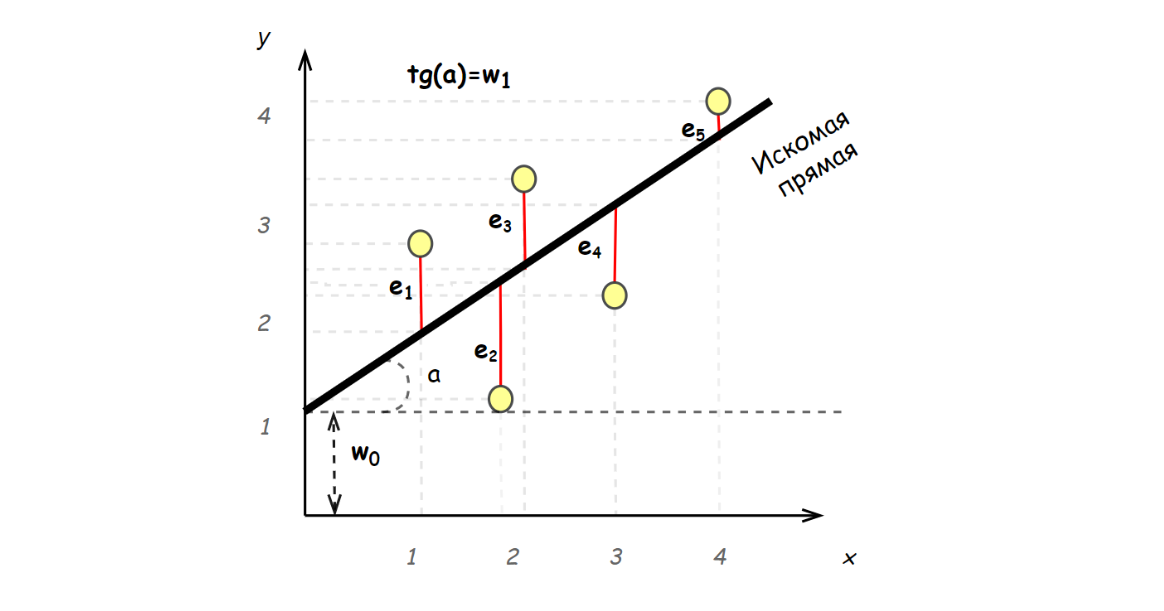

    Что вообще есть ошибка? В самом простом понимании это расхождение между истиной и предсказанием.

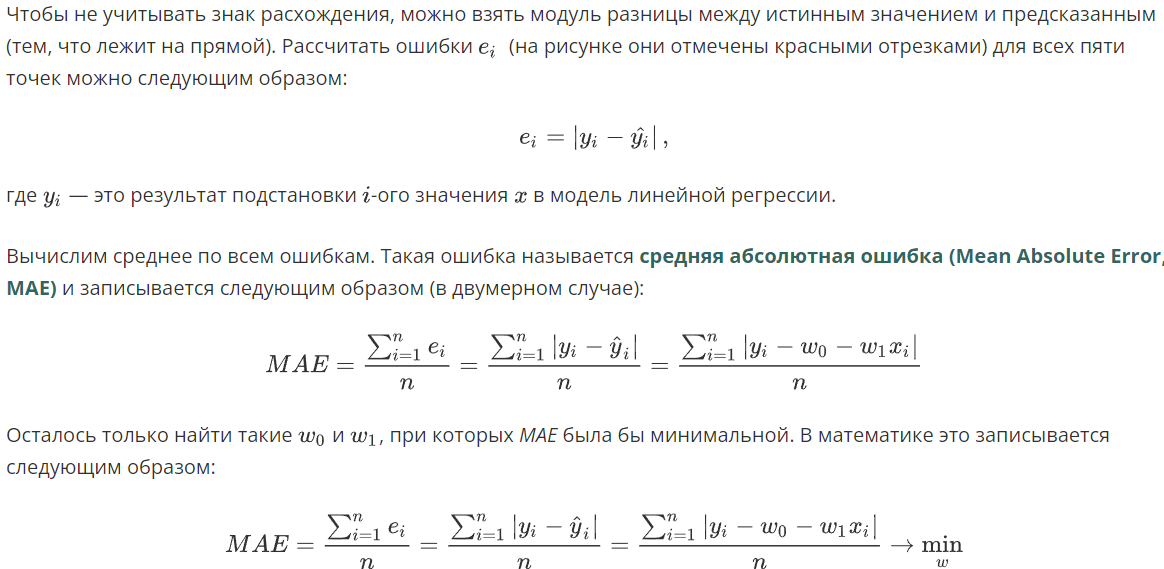

→ Тут-то математики и столкнулись с проблемой. Оказывается, если пытаться решить эту оптимизационную задачу классическими способами (через условия экстремума функции), то поиск решения будет противоречить основным законам математического анализа. Почему? Обсудим это в модулях по математике, когда будем решать оптимизационные задачи.

Функция модуля является недифференцируемой в точке 0, то есть не имеет производной. Классическая оптимизационная задача решается через равенство производной функции нулю. Поиск производной может обернуться математическим противоречием.

Проблему с MAE можно решить, но всё же она используется гораздо реже.

Но математикам, конечно, удалось найти выход. Вместо модуля можно использовать квадрат — он тоже убирает знак ошибки и по сути аналогичен модулю. Получим **среднеквадратичную ошибку (Mean Square Error, MSE):**

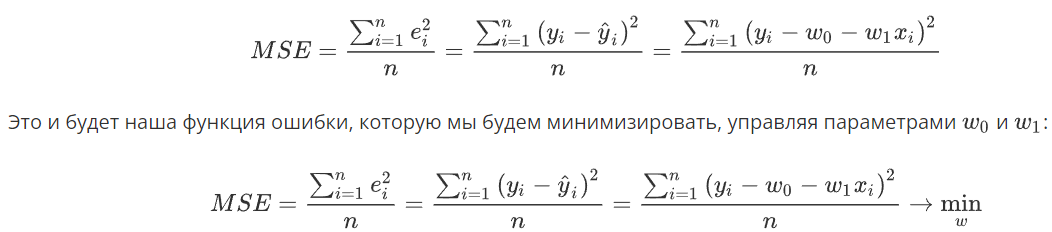

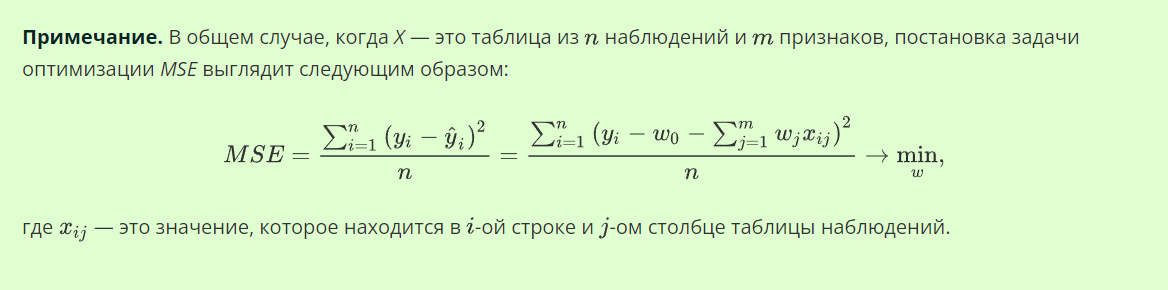

Математике известно решение данной задачи оптимизации. Метод поиска параметров линейной регрессии **называется методом наименьших квадратов (сокращённо — МНК)** и был изобретён Гауссом ещё в 1795 году. В английской литературе часто можно встретить аббревиатуру OLS (Ordinary Least Squares).

→ Решать саму задачу поиска минимума функции мы сейчас не будем, так как пока что не владеем достаточными для её решения знаниями о частной производной и условиях экстремума функции многих переменных, но приведём финальный ответ, полученный для общего случая.

Итак, пусть у нас есть матрица X, в которой по строкам собрано $n$ наблюдений, а по столбцам отложено $m$ факторов — по сути, это обычный, привычный нам DataFrame. К каждому примеру из таблицы X есть ответ y.

Зависимость между факторами и целевым признаком принята линейной, то есть рассматривается обучение модели линейной регрессии:

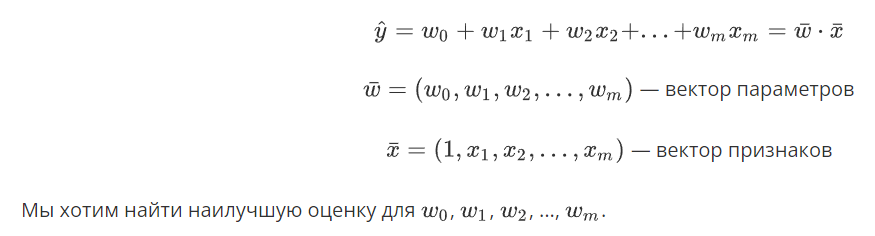

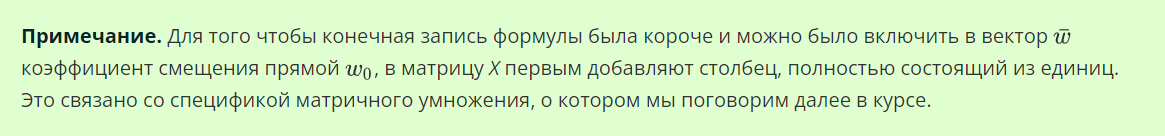

Согласно методу наименьших квадратов, аналитическое выражение для поиска вектора коэффициентов уравнения линейной регрессии имеет вид:

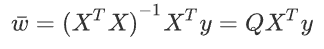

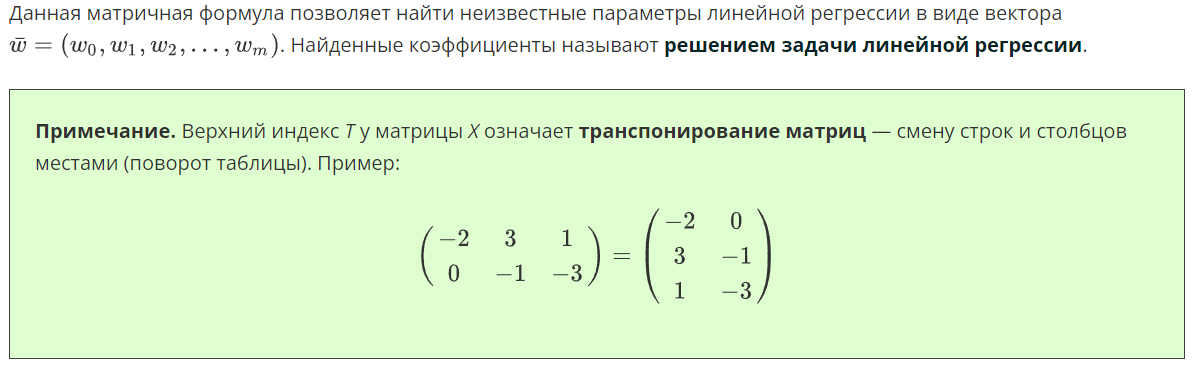

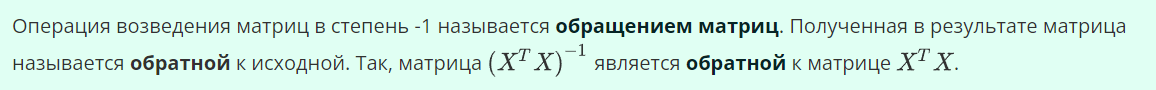

Саму процедуру обращения матриц мы будем рассматривать в модуле по линейной алгебре. Сейчас же для проведения этой операции мы будем использовать библиотеку numpy, которая позволяет очень быстро и просто обращать матрицы.

## АНАЛИТИЧЕСКОЕ РЕШЕНИЕ С ПОМОЩЬЮ NUMPY

Перейдём к практической части. Давайте научимся строить аналитическое решение линейной регрессии по МНК в Python.

Вот какие этапы нам предстоит пройти, чтобы построить свою модель:

1. Загрузить данные и проанализировать датасет на предмет пропусков.
2. Подготовить данные для подачи в модель: избавиться от пропусков, если они есть, и перекодировать категориальные признаки, если они представлены текстом.
3. Построить модель. Будем строить несколько моделей линейной регрессии: первую — на одном признаке, вторую — на всех доступные признаках.
4. Оценить качество модели.


Для начала импортируем необходимые вспомогательные библиотеки:

In [55]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации
%matplotlib inline
plt.style.use('seaborn') #установка стиля matplotlib

C:\Users\nikol\AppData\Local\Temp\ipykernel_10484\546158159.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn') #установка стиля matplotlib


Будем работать с датасетом из библиотеки sklearn о домах в Бостоне. Этот набор данных содержит информацию, собранную службой переписи населения США и касающуюся жилья в районе Бостона, штат Массачусетс.

Данный датасет содержится в модуле datasets библиотеки sklearn. Давайте загрузим датасет с помощью функции load_boston() и выведем его описание, обратившись по ключу 'DESCR':



In [56]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston_data = pd.read_csv('C:\IDE\ML_2_Обучение_с_учителем_регрессия\data\housing.csv', header=None, delimiter=r"\s+", names=column_names)
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Выведем информацию о таблице boston_data с помощью метода info():

In [57]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


`Примечание.` Модель линейной регрессии требует, чтобы в подаваемых ей на вход данных не было пропущенных значений. Поэтому если в ваших данных окажутся пропуски, обязательно заранее позаботьтесь о них (способы мы изучали в модуле по очистке данных).

Итак, в наших данных нет пропусков, а значит их можно подавать в модель, чтобы обучить её предсказывать целевой признак (признак MEDV).

    Также модель не умеет работать с категориальными признаками, представленными в виде типа object. Прежде чем подавать в модель линейной регрессии категориальные признаки, необходимо произвести кодировку категорий с помощью уже знакомых вам методов кодирования.

→ Давайте начнём с простого. Построим линейную регрессию на одном признаке. Выберем признак, который имеет наиболее высокую линейную взаимосвязь. Для этого рассчитаем корреляцию признаков с целевой переменной и выберем наиболее влиятельный.

Для лучшего восприятия давайте построим столбчатую диаграмму для модульного значения корреляций:

`Примечание.` Мы могли визуализировать матрицу корреляций, однако сейчас нас интересует только связь факторов с целевым признаком, поэтому нагляднее будет воспользоваться столбчатой диаграммой.

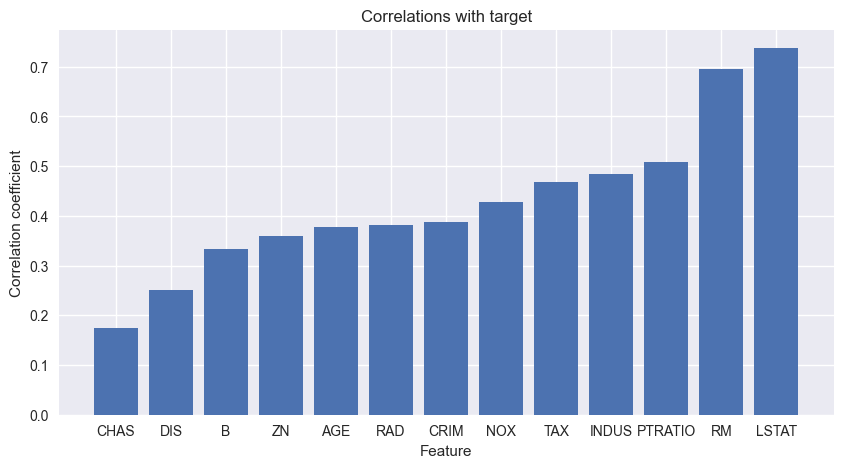

In [58]:
#Вычисляем модуль корреляции
corr_with_target = boston_data.corr()['MEDV'].abs().sort_values()
#Удаляем корреляцию целевой переменной с самой собой
corr_with_target = corr_with_target.drop('MEDV')
#Строим столбчатую диаграмму корреляций
fig, ax = plt.subplots(figsize=(10, 5)) #фигура+координатная плоскость
ax.bar(corr_with_target.index, corr_with_target.values) #столбчатая диаграмма
ax.set_title('Correlations with target') #название графика
ax.set_xlabel('Feature') #название оси x
ax.set_ylabel('Сorrelation coefficient'); #название оси y

Итак, самый коррелированный по модулю с медианной ценой (MEDV) признак — процент населения с низким статусом (LSTAT). Давайте построим линейную регрессию, используя этот признак.

`Примечание.` Построить линейную регрессию = обучить линейную регрессию = найти её параметры.

Вспоминаем нашу формулу аналитического решения по методу наименьших квадратов:

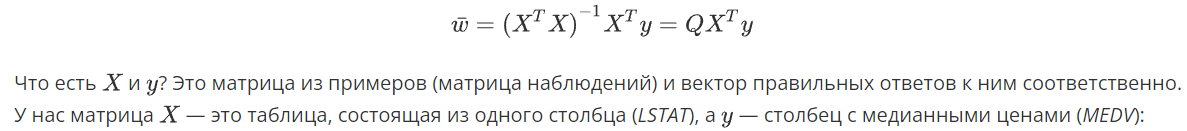

In [59]:
X = boston_data[['LSTAT']] #матрица наблюдений
y = boston_data['MEDV'] #вектор правильных ответов
X.head()
#y.head()

,LSTAT
0,4.98
1,9.14
2,4.03
3,2.94
4,5.33


`Примечание.` Двойные квадратные скобки boston_data[['LSTAT']] позволяют выбрать признак из DataFrame, сохранив его в виде таблицы. Это важно, так как в формуле МНК $X$ — это матрица.

У нас есть все компоненты формулы, чтобы найти параметры модели. Давайте напишем функцию linear_regression(), в которой реализуем вычисления коэффициентов. Аргументами функции будут матрица наблюдений X и вектор ответов y, а возвращать она будет вектор параметров w.

Матричные вычисления легче всего реализовать через библиотеку numpy.

Для начала вспомним, что для вычисления свободного члена $w0$ необходимо добавить в таблицу столбец, полностью состоящий из единиц. Такой столбец можно создать с помощью знакомой нам функции ones() из библиотеки numpy, а присоединить его к таблице X поможет функция column_stack().

Матричное умножение в numpy реализуется с помощью оператора @. Транспонирование осуществляется через .T, а обратная матрица вычисляется с помощью функции inv() из модуля linalg (модуля для линейной алгебры).

In [60]:
def linear_regression(X, y):
    #Создаём вектор из единиц
    ones = np.ones(X.shape[0])
    #Добавляем вектор к таблице первым столбцом
    X = np.column_stack([ones, X])
    #Вычисляем обратную матрицу Q
    Q = np.linalg.inv(X.T @ X)
    #Вычисляем вектор коэффициентов
    w = Q @ X.T @ y
    return w

Осталось только вызвать нашу функцию и передать в неё нашу таблицу примеров X и столбец правильных ответов y. Вычислим вектор параметров и выведем его на экран:

In [61]:
#Вычисляем параметры линейной регрессии
w = linear_regression(X, y)
#Выводим вычисленные значения параметров в виде вектора
print('Vector w: {}'.format(w))
#Выводим параметры с точностью до двух знаков после запятой
print('w0: {:.2f}'.format(w[0]))
print('w1: {:.2f}'.format(w[1]))
# Vector w: [34.55384088 -0.95004935]
# w0: 34.55
# w1: -0.95

Vector w: [34.55384088 -0.95004935]
w0: 34.55
w1: -0.95


Итак, мы получили значения коэффициентов уравнения прямой. С точностью до сотых они равны:

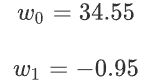

А значит сама модель будет иметь вид:

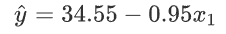

Самое приятное в модели линейной регрессии — то, что её коэффициенты можно проинтерпретировать. 

Коэффициент $w0 = 34.55$ имитирует влияние сторонних факторов, которые не учтены в модели. Это значение медианной цены домов на участке, если бы значение процента населения с низким статусом было равно 0. 

Коэффициент $w1 = -0.95$ означает, на сколько в среднем изменится медианная цена (в тысячах долларов) при увеличении низкостатусного населения на 1 единицу. То есть если количество низкостатусного населения увеличится на 1 %, то медианная цена зданий на участке упадёт на 0.95 тысяч долларов. Можно сказать, что каждый новый процент низкостатусного населения уменьшает медианную цену на 0.95 тысяч долларов.

Теперь, если в данных появится новый участок Бостона с известной долей низкостатусного населения, мы сможем предсказать значение медианной стоимости домов простой подстановкой значений в модель:

In [62]:
#Задаём процент низкостатусного населения
x_example = 5.18 
#Делаем предсказание
y_predict = w[0] + w[1] * x_example
print('Predicted value: {:.2f}'.format(float(y_predict)))
#Predicted value: 29.63

Predicted value: 29.63


Так как мы работаем с одним фактором, то можем построить визуализацию нашей модели.

Давайте напишем функцию plot_regression_2d(), у которой будет три обязательных аргумента (матрица наблюдений X, столбец правильных ответов y и столбец с предсказаниями модели y_pred) и два аргумента по умолчанию (xlabel — подпись оси абсцисс и ylabel — подпись оси ординат).

In [63]:
def plot_regression_2d(X, y_true, y_predict, xlabel='LSTAT', ylabel='MEDV'):
    fig, ax = plt.subplots(figsize=(8, 4)) #фигура + координатная плоскость
    ax.scatter(X, y_true, alpha=0.7, label='Sample data') #диаграмма рассеяния
    ax.plot(X, y_predict, color='black', label='Regression model') #линейный график
    ax.set_xlabel(xlabel) #название оси абсцисс
    ax.set_ylabel(ylabel) #название оси ординат
    ax.legend(facecolor='white', fontsize=11) #легенда

Сделаем предсказание для всех объектов из таблицы X, подставив её в модель линейной регрессии с найденными параметрами, и построим график:

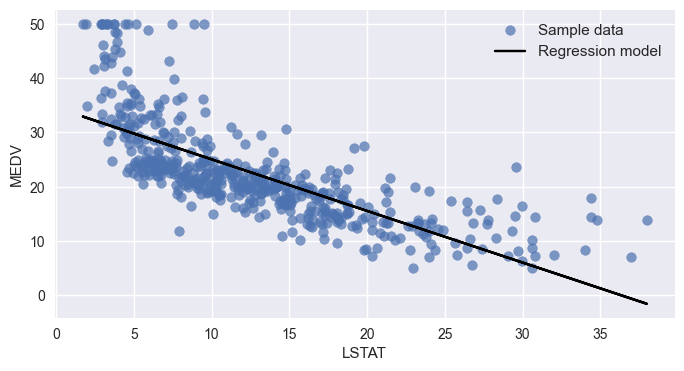

In [64]:
#Делаем предсказание для всех объектов из таблицы
y_predict = w[0] + w[1] * X
#Строим визуализацию
plot_regression_2d(X, y, y_predict)

Как и ожидалось, прямая является убывающей (коэффициент $w0 < 1$), и, если её продолжить влево, она пересечётся с осью ординат в точке $w0 = 34.55$. 

Итак, мы воспользовались формулой для МНК алгоритма и нашли параметры модели линейной регрессии «вручную», реализовав формулу в виде функции. Отметим, что наша функция универсальна: в неё можно подавать не только матрицу $X$ с одним признаком (LSTAT), но и таблицу, содержащую все признаки, описывающие участки.

Конечно же, никто не строит линейную регрессию «руками», используя формулу МНК. Все дата-сайентисты пользуются библиотеками, такими как sklearn. Давайте посмотрим на реализацию ↓

## АНАЛИТИЧЕСКОЕ РЕШЕНИЕ С ПОМОЩЬЮ SKLEARN

Алгоритм построения модели реализован в библиотеке машинного обучения sklearn и находится в модуле linear_model. Давайте импортируем этот модуль:

In [65]:
from sklearn import linear_model

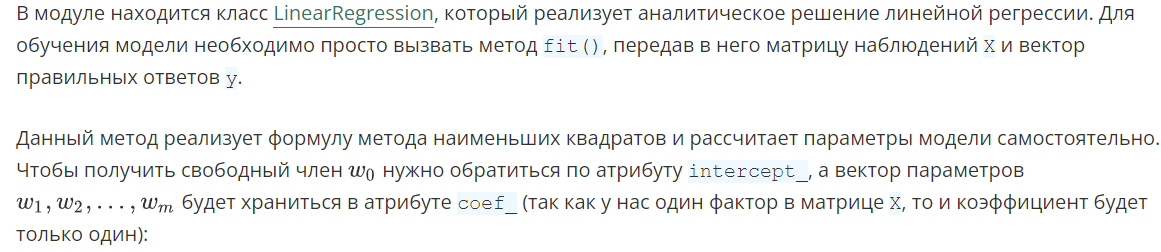

In [66]:
#Создаём объект класса LinearRegression
lr_lstat = linear_model.LinearRegression()
#Обучаем модель — ищем параметры по МНК
lr_lstat.fit(X, y)
 
print('w0: {}'.format(lr_lstat.intercept_)) #свободный член w0
print('w1: {}'.format(lr_lstat.coef_)) #остальные параметры модели w1, w2, ..., wm
 
# w0: 34.55384087938311
# w1: [-0.95004935]

w0: 34.5538408793831
w1: [-0.95004935]


`Примечание.` Обратите внимание, что мы получили ровно те же самые значения для параметров модели, что является вполне ожидаемым, ведь метод fit() у объекта LinearRegression реализует ту же самую формулу МНК, которую мы прописали в функции linear_regression(). Интерпретация коэффициентов остаётся той же.

Модель обучена. А как сделать предсказание? Вручную записывать выражение для модели и подставлять коэффициенты? Конечно же, нет. Для этого есть метод predict(). В него необходимо передать матрицу наблюдений, для которых нужно сделать предсказание.

Давайте сделаем предсказание для всех наших наблюдений из таблицы X и визуализируем результат с помощью нашей функции plot_regression_2d():

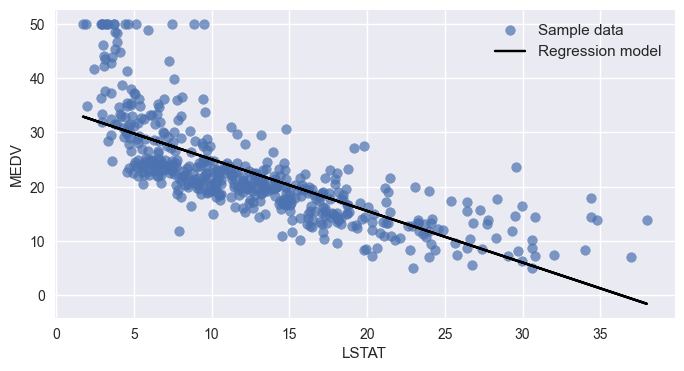

In [67]:
#Предсказываем медианную цену для всех участков из набора данных
y_predict = lr_lstat.predict(X)
#Строим визуализацию
plot_regression_2d(X, y, y_predict)

Получаем тот же самый график, что мы видели ранее, когда реализовывали линейную регрессию вручную.

А что, если мы хотим построить линейную регрессию, используя всю предоставленную информацию, то есть все 13 признаков? Не проблема! Нужно только расширить матрицу наблюдений $X$, добавив в неё остальные признаки и снова обучить модель LinearRegression.

Давайте выберем из таблицы boston все столбцы, исключая столбец с целевой переменной (MEDV). Полученную матрицу X и вектор правильных ответов y отправляем в метод fit(), чтобы произвести подгонку и найти параметры модели.

In [68]:
#Составляем список факторов (исключили целевой столбец)
features = boston_data.drop('MEDV', axis=1).columns
#Составляем матрицу наблюдений X и вектор ответов y
X = boston_data[features]
y = boston_data['MEDV']
#Создаём объект класса LinearRegression
lr_full = linear_model.LinearRegression()
#Обучаем модель — ищем параметры по МНК
lr_full.fit(X, y)

LinearRegression()

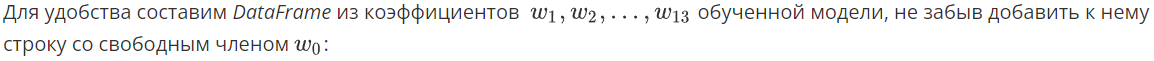

In [69]:
#Составляем таблицу из признаков и их коэффициентов
w_df = pd.DataFrame({'Features': features, 'Coefficients': lr_full .coef_})
#Составляем строку таблицы со свободным членом
intercept_df =pd.DataFrame({'Features': ['INTERCEPT'], 'Coefficients': lr_full .intercept_})
coef_df = pd.concat([w_df, intercept_df], ignore_index=True)
display(coef_df)

,Features,Coefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


Итак, мы получили таблицу с признаками из нашего набора данных и коэффициентами, которые им соответствуют.

Каждый из коэффициентов в модели показывает, на сколько в среднем (согласно модели) изменится медианная цена (в тысячах долларов) при увеличении параметра на единицу. Например, если уровень преступности увеличится на один пункт, то медианная цена зданий на участке упадёт на 0.1 тыс. долларов. А вот увеличение среднего количества комнат на участке (RM) на одну единицу повысит медианную цену на 3.8 тыс. долларов.

→ Свободный член (INTERCEPT) всё так же имитирует влияние внешних факторов и носит смысл «поправки» модели относительно медианной стоимости.

Итак, мы с вами построили две модели линейной регрессии: lr_lstat на одном признаке (LSTAT) и lr_full — на всех признаках в данных. Хотелось бы сравнить эти модели по их качеству. Может, нам достаточно только знаний о проценте низкостатусного населения, чтобы предсказать медианную цену?

Самая простая идея — визуализировать ошибки. Давайте построим коробчатые диаграммы ошибок моделей. Ошибки будем считать по формуле:

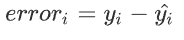

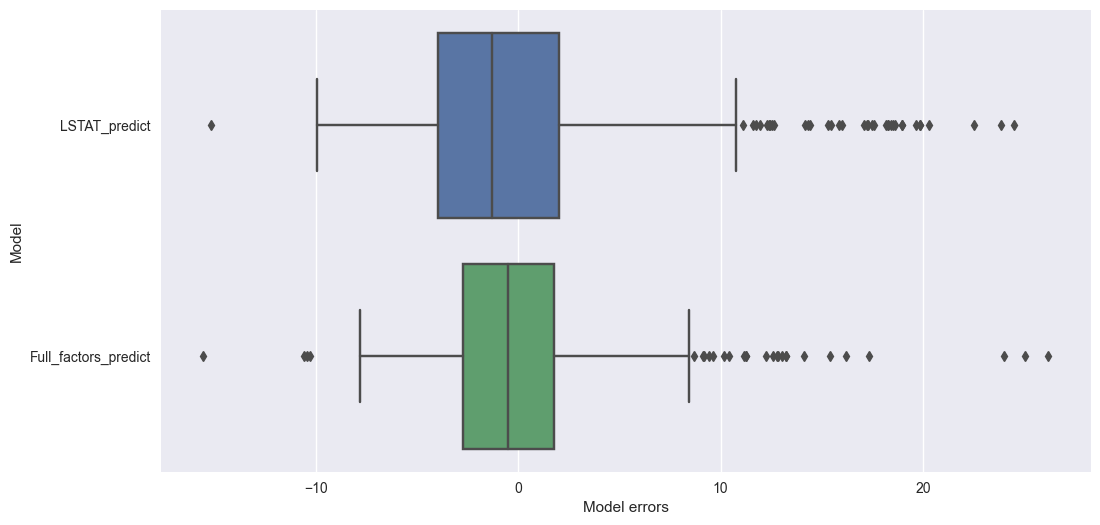

In [70]:
#Визуализируем ошибки
fig, ax = plt.subplots(figsize=(12, 6)) #фигура + координатная плоскость
#Ошибки модели на одном факторе LSTAT
y_errors_lstat = y - lr_lstat.predict(boston_data[['LSTAT']])
#Ошибки модели на всех факторах
y_errors_full = y - lr_full.predict(boston_data[features])
#Для удобства визуализации составим DataFrame из ошибок
errors_df = pd.DataFrame(
    {'LSTAT_predict': y_errors_lstat, 
     'Full_factors_predict': y_errors_full
    }
)
#Строим boxplot для ошибок
sns.boxplot(data=errors_df, orient='h', ax=ax)
ax.set_xlabel('Model errors') #название оси абсцисс
ax.set_ylabel('Model'); #название оси ординат

Из построенных диаграмм ошибок видно, что разброс ошибок для модели, построенной на всех признаках, ниже (ящик уже и усы короче), и медиана ошибки также более приближена к 0. То есть можно сказать, что визуально качество второй модели выглядит лучше.

На обеих диаграммах присутствуют точки, сильно выбивающиеся за пределы усов. Это наблюдения, для которых модель допустила очень большую ошибку, по сравнению с основной группой.

Можно предположить, что это объекты, для которых гипотеза о линейной зависимости несправедлива, и линейной модели не хватает для предсказания целевой переменной для таких объектов. О том, как справиться с этой проблемой, мы поговорим чуть позже.

Визуализация — это, конечно, хорошо, но, согласитесь, не очень удобно: визуализация не даёт конкретики — только общие представления об ошибках.

Может быть, есть способ описать качество модели каким-то конкретным числом? Да. Этот показатель называется метрикой. 

In [50]:
new = pd.DataFrame({'CRIM': [0.35114], 'ZN': [0.0], 'INDUS': [7.38],
           'CHAS': [0.0], 'NOX': [0.493], 'RM': [6.041],
           'AGE': [49.9], 'DIS': [4.7211], 'RAD': [5.0],
           'TAX': [287.0], 'PTRATIO': [19.6], 'B': [396.9],
           'LSTAT': [7.7]})
print(np.round(lr_full.predict(new), 2))

[22.87]


In [51]:
def linear_regression(X, y):
    #Создаем вектор из единиц
    ones = np.ones(X.shape[0])
    #Добавляем вектор к таблице первым столбцом
    X = np.column_stack([ones, X])
    #Вычисляем обратную матрицу Q
    Q = np.linalg.inv(X.T @ X)
    #Вычисляем вектор коэффициентов
    w = Q @ X.T @ y
    return w
 
startups_data = pd.read_csv('C:\IDE\ML_2_Обучение_с_учителем_регрессия\data\\50_Startups.csv')
#Разделяем факторы и целевой признак
X = startups_data[['R&D Spend', 'Administration', 'Marketing Spend']]
y = startups_data['Profit']
#Производим кодирование
X = pd.get_dummies(X)
#Вычисляем параметры
w = linear_regression(X, y)
print('{:.2f}'.format(w[1]))
print('{:.2f}'.format(w[2]))
print('{:.2f}'.format(w[3]))

0.81
-0.03
0.03


# 3_Метрики регрессии. Недостатки аналитического решения

    Метрика — это численное выражение качества моделирования.

Для оценки качества решения задачи регрессии существует множество метрик. Давайте рассмотрим самые основные и часто используемые.

## МЕТРИКИ РЕГРЕССИИ

Будем рассматривать метрики для задачи регрессии на следующем примере. Возьмём первые пять наблюдений из нашей таблицы и предсказанные для них моделью lr_lstat ответы:

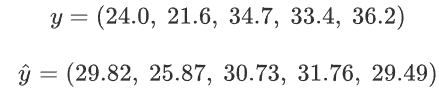

На этих значениях мы будем рассматривать следующие метрики:

1. **Средняя абсолютная ошибка — MAE (Mean Absolute Error)**

Это самый простой и уже знакомый вам показатель. Чтобы посчитать данную метрику, нужно найти все остатки (разницы между предсказанным значением и реальным), взять от каждого из них модуль, сложить их и поделить на количество. Иными словами, нам нужно найти среднее арифметическое модуля отклонения предсказанного значения от реального.

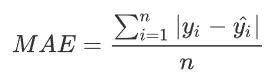

Данная метрика интерпретируется очень легко: это число показывает, насколько в среднем наша модель ошибается. Чем меньше значение метрики, тем лучше.

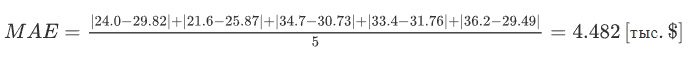

То есть для нашего примера из пяти наблюдений в среднем модель ошибается на 4.482 тысячи долларов.

Много ли это? Хороший вопрос, на который без эксперта-оценщика недвижимости будет сложно дать ответ. Однако можно попробовать посчитать ошибку в процентах, ведь в процентах всё воспринимается легче, и для этого нам пригодится следующая метрика — MAPE.

2. **Средняя абсолютная ошибка в процентах — MAPE (Mean Absolute Percent Error)**

Для её вычисления мы делим модуль разницы между предсказанием алгоритма и истинным значением на истинное значение. Затем складываем все результаты (для каждого объекта), делим на количество и умножаем на 100 %.

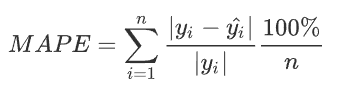

*Эта метрика показывает, на сколько процентов в среднем наше предсказание отклоняется от реального значения. Эта метрика отлично показывает себя в задачах, когда неизвестно, какое значение целевого показателя считать приемлемым.*

Например, средняя ошибка — 2 тысячи долларов. Это много или мало? Смотря для чего... А вот средняя ошибка, равная 80 % — это много или мало? Определённо много.



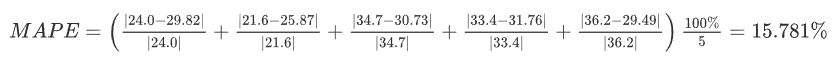

Таким образом, на первых пяти наблюдениях модель в среднем ошибается на 15.781 %. Это довольно неплохой результат.

3. **Средняя квадратическая ошибка — MSE**

Данный показатель мы используем в линейной регрессии в качестве функции потерь, но ничто не мешает нам также использовать его и в качестве метрики.

Логика вычисления данной ошибки очень похожа на предыдущую. Разница лишь в том, что вместо модуля разности между предсказанным и реальным значениями мы берём квадрат этого модуля:

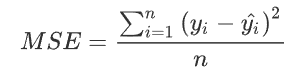

*Данная метрика хуже поддаётся интерпретации, чем предыдущая, так как измеряется не в единицах, а в квадратах единиц. Она чаще используется для внутреннего обсуждения между дата-сайентистами, заказчику такая метрика может быть непонятна.*

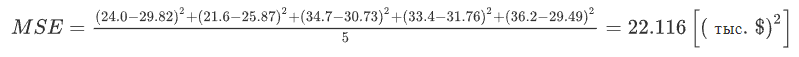

Таким образом, для нашего примера квадрат отклонения составляет 22.116 тысяч долларов в квадрате.

Согласитесь, не очень понятно, о чём идет речь. Однако данная метрика является популярной, так как позволяет «штрафовать» модель за очень большие ошибки.

**Что значит «штрафовать»?**

Например, расхождение в 200 единиц в метрике MSE воспринимается как $200^2$, а в метрике MAE это расхождение воспринимается как 200. Поэтому, если у нас есть две модели, но одна из них допускает большие ошибки, эти ошибки становятся ещё больше при расчёте метрики MSE, и нам легче сравнить модели между собой.

Но в то же время это и проклятие MSE. Если в данных присутствуют выбросы, метрика может быть необъективной. Если модель будет утверждать, что цена здания — 30 тысяч долларов, а в наборе данных ему соответствует цена в 3 миллиона долларов, то при возведении такой ошибки в квадрат получится 9 миллионов, что может сбить с толку исследователя. Необходимо скептически относиться к данной метрике, если вы не проводили исследование данных на предмет наличия выбросов.

4. **Корень из средней квадратической ошибки — RMSE (Root Mean Squared Error)**

Для получения RMSE надо просто извлечь квадратный корень из MSE:



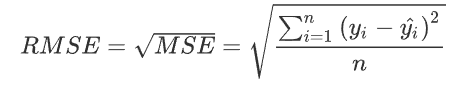

Корень извлекается для того, чтобы привести размерности ответов и ошибок в соответствие и сделать метрику более понятной.

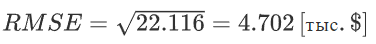

Преимущества и недостатки этой метрики такие же, как и у MSE, к преимуществам добавляется только понятная размерность.

5. **Коэффициент детерминации ($R^2$)**

Все рассматриваемые ранее метрики имели масштаб от 0 до $+∞$. Чем это плохо?

А что если нам скажут, что MSE для модели составляет 32? Должны ли мы улучшить модель, или она достаточно хороша? А что если MSE = 0.4?

На самом деле, трудно понять, хороша модель или нет, не сравнив её показатели с теми же показателями других моделей.

Коэффициент детерминации, или $R^2$, является ещё одним показателем, который мы можем использовать для оценки модели. Он тесно связан с MSE, но его преимущество в том, что $R^2$ всегда находится в промежутке между $-∞$ и 1.

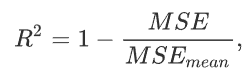

где

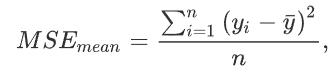

где



То есть $R^2$ показывает, насколько наша модель лучше, чем если бы все предсказания были средним по правильным ответам.

Посмотрим, как считается $R^2$. Сначала рассчитаем среднее по правильным ответам:

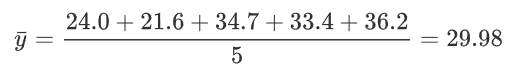

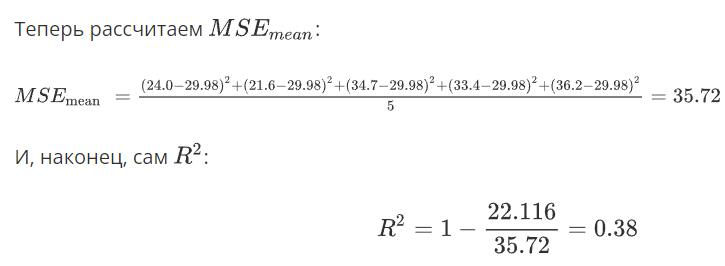

Есть ещё одна интерпретация данной метрики. Статистически показатель $R^2$ описывает, какую долю информации о зависимости (дисперсии) смогла уловить модель.

Удовлетворительным $R^2$ считается показатель выше 0.5: чем ближе к 1, тем лучше. Отрицательные значения $R^2$ говорят о том, что построенная модель настолько плоха, что лучше было бы присвоить всем ответам среднее значение.

Давайте обобщим всё вышесказанное в виде таблицы:
https://apps.skillfactory.ru/learning/course/course-v1:SkillFactory+DSPR-2.0+14JULY2021/block-v1:SkillFactory+DSPR-2.0+14JULY2021+type@sequential+block@19ca9ecfcf6a4719ab51a5bdc26fb8a0/block-v1:SkillFactory+DSPR-2.0+14JULY2021+type@vertical+block@42deb342ff474fdb84c8aa12baaed39d

## РАСЧЁТ МЕТРИК НА PYTHON

Настало время проверить качество построенных нами ранее моделей линейной регрессии: lr_lstat и lr_full.

Весь набор функций для вычисления метрик в sklearn находится в модуле metrics. Давайте его импортируем:

In [52]:
from sklearn import metrics

Функции, которые нам понадобятся:

* mean_absolute_error() — расчёт MAE;
* mean_squared_error() — расчёт MSE;
* mean_absolute_percentage_error() — расчёт MAPE;
* r2_score() — расчёт коэффициента детерминации $R^2$.

В каждую из функций достаточно передать правильные ответы и предсказания, и функция вернёт рассчитанную метрику.

`Примечание.` Для расчёта метрики RMSE нет специальной функции, однако мы знаем, что для её расчёта достаточно извлечь квадратный корень из MSE.

Из-за особенностей реализации функция mean_absolute_percentage_error() возвращает результат не в процентах, а в долях. Чтобы отобразить результат в процентах, необходимо умножить его на 100.

Давайте вычислим метрики и выведем их на экран, округлив до третьего знака после запятой. Начнём с модели lr_lstat: сделаем предсказание на основании признака LSTAT и передадим истинные и предсказанные медианные цены в функции для расчёта метрик:

In [71]:
#Делаем предсказание по признаку LSTAT
y_predict_lstat = lr_lstat.predict(boston_data[['LSTAT']])
#Рассчитываем MAE
print('MAE score: {:.3f} thou. $'.format(metrics.mean_absolute_error(y, y_predict_lstat)))
#Рассчитываем RMSE
print('RMSE score: {:.3f} thou. $'.format(np.sqrt(metrics.mean_squared_error(y, y_predict_lstat))))
#Рассчитываем MAPE
print('MAPE score: {:.3f} %'.format(metrics.mean_absolute_percentage_error(y, y_predict_lstat) * 100))
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict_lstat)))
 

MAE score: 4.505 thou. $
RMSE score: 6.203 thou. $
MAPE score: 21.352 %
R2 score: 0.544


Проделываем ту же самую операцию для второй модели линейной регрессии, lr_full:

In [72]:
#Делаем предсказание по всем признакам
y_predict_full = lr_full.predict(boston_data[features])
#Рассчитываем MAE
print('MAE score: {:.3f} thou. $'.format(metrics.mean_absolute_error(y, y_predict_full)))
#Рассчитываем RMSE
print('RMSE score: {:.3f} thou. $'.format(np.sqrt(metrics.mean_squared_error(y, y_predict_full))))
#Рассчитываем MAPE
print('MAPE score: {:.3f} %'.format(metrics.mean_absolute_percentage_error(y, y_predict_full) * 100))
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict_full)))

MAE score: 3.271 thou. $
RMSE score: 4.679 thou. $
MAPE score: 16.417 %
R2 score: 0.741


Сравним полученные результаты:

* $MAE$: в среднем первая модель ошибается на  4.505 тыс. долларов, а вторая — на 3.271 тыс. долларов.
* $RMSE$: среднеквадратичное отклонение первой модели от истинных ответов составляет 6.203 тыс. долларов, а второй — 4.679.
* $MAPE$: первая модель ошибается на 21.352 %, а вторая — на 16.417 %.
* $R^2$: доля объясняемой информации (дисперсии), которую улавливает первая модель, — 0.544, а вторая — 0.741.

Очевидно, что по всем метрикам вторая модель, построенная на основе всех признаков в данных, превосходит первую.

In [73]:
y_true = [1.23, 2.35, 2.75]
y_pred = [1.01, 12.3, 2.74]
print('RMSE score: {:.2f} thou. $'.format(np.sqrt(metrics.mean_squared_error(y_true, y_pred))))

RMSE score: 5.75 thou. $


In [74]:
y_true = [22.4, 20.6, 23.9, 22.0, 11.9]
y_pred = [20.5, 20.2, 20.3, 19.0, 11.0]
print('R2 score: {:.2f}'.format(metrics.r2_score(y_true, y_pred)))

R2 score: 0.71


## НЕДОСТАТКИ АНАЛИТИЧЕСКОГО РЕШЕНИЯ

Ранее мы с вами рассмотрели, что такое модель линейной регрессии, и научились рассчитывать её параметры с помощью аналитического подхода — метода наименьших квадратов.

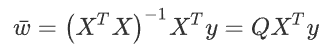

Метод наименьших квадратов позволяет очень просто получить коэффициенты , подставив таблицу в формулу. Вот, собственно, и всё «обучение». 

→ Существует теорема Гаусса-Маркова, которая говорит о том, что, если выполнены все условия теоремы, МНК всегда находит оптимальные оценки параметров. Мы ещё вернемся к этой теореме, когда будем говорить об МНК в модулях по линейной алгебре.

Казалось бы, относительно простая математика: надо всего лишь перемножить матрицы между собой и получить ответ. Особенно простой эта задача должна быть для компьютера. Но нам так кажется, поскольку мы ранее не сталкивались с матричным умножением и будем говорить о нём только в модулях по линейной алгебре.

    Оказывается, у такого простого подхода есть один большой минус — это работа с большим количеством признаков.

Давайте внимательно посмотрим на операцию обращения матриц (возведение в степень -1):



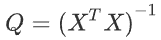

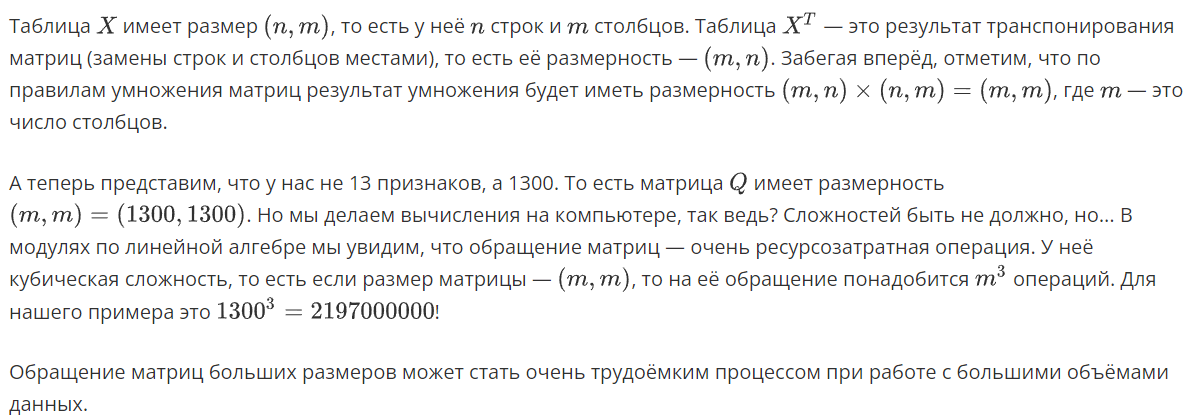

    Второй недостаток МНК — это невозможность инкрементального обучения, или обучения в режиме реального времени.

### Что это такое?

Представьте, что мы построили модель, но собираемся её уточнять в процессе эксплуатации. К нам приходят всё новые данные, и мы должны изменять параметры модели, подстраиваясь под новые зависимости.

Если мы используем метод fit() для модели LinearRegression и передадим в него новые данные, то коэффициенты модели будут рассчитаны по новым данным, а прошлые наблюдения будут забыты. То есть придётся добавлять данные в таблицу и переобучать модель на всех доступных данных ещё раз.

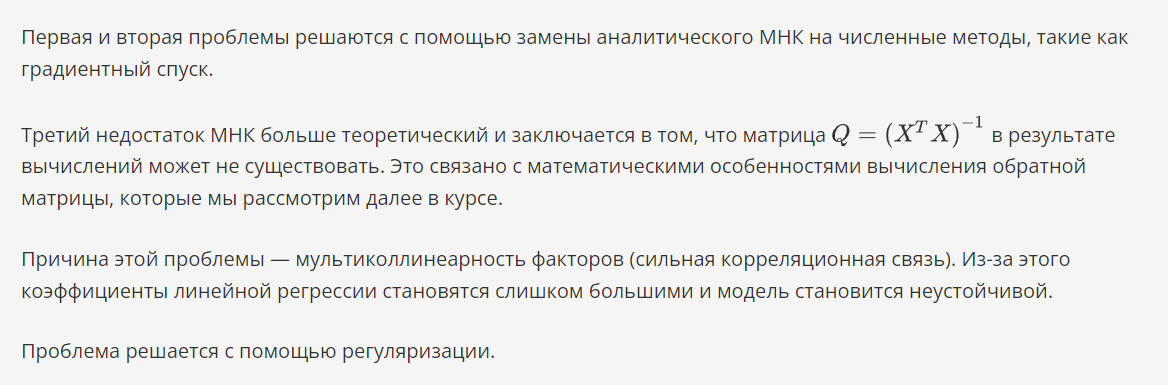

# 4_Линейная регрессия: численное решение